In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df=pd.read_excel('Data_Train.xlsx')
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
test_df=pd.read_excel(r'Test_set.xlsx')
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [4]:
print(train_df.shape)
print(test_df.shape)

(10683, 11)
(2671, 10)


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train_df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
4h 10m       1
3h 25m       1
33h 20m      1
41h 20m      1
35h 20m      1
Name: Duration, Length: 368, dtype: int64

In [7]:
train_df.dropna(inplace=True)

In [8]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

EDA

In [9]:
train_df["Journey_day"] = pd.to_datetime(train_df.Date_of_Journey, format="%d/%m/%Y").dt.day

In [10]:
train_df['journey_month'] = pd.to_datetime(train_df['Date_of_Journey'], format='%d/%m/%Y').dt.month

In [11]:
train_df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [12]:
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [13]:
train_df['Dep_hour']=pd.to_datetime(train_df['Dep_Time']).dt.hour

train_df['Dep_min']=pd.to_datetime(train_df['Dep_Time']).dt.minute

In [14]:
train_df.drop(['Dep_Time'],axis=1,inplace=True)
train_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [15]:
train_df['Arr_hour']=pd.to_datetime(train_df.Arrival_Time).dt.hour

train_df['Arr_min']=pd.to_datetime(train_df.Arrival_Time).dt.minute

In [16]:
train_df.drop(['Arrival_Time'],axis=1,inplace=True)
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [17]:
duration = list(train_df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) 

In [18]:
train_df["Duration_hours"] = duration_hours
train_df["Duration_mins"] = duration_mins

In [19]:
train_df.drop(['Duration'],axis=1,inplace=True)
train_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


#handling categorical data

In [20]:
# 1. nomial data --> data are not in any order --> One Hot Encoder in this case
# 2. ordinal data--> data are in order --> LabelEncoder is used in thi case


In [21]:
train_df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [22]:
Airline=train_df[['Airline']]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [23]:
train_df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [24]:
Source = train_df[['Source']]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [25]:
train_df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [26]:
Destination=train_df[['Destination']]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [27]:
train_df.drop(['Route','Total_Stops'],axis=1,inplace=True)

In [28]:
data_train=pd.concat([train_df,Airline,Source,Destination],axis=1)
data_train.head()

,Airline,Source,Destination,Additional_Info,Price,Journey_day,journey_month,Dep_hour,Dep_min,Arr_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,No info,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,No info,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,No info,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,No info,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,No info,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [29]:
data_train.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [30]:
data_train.head()

,Additional_Info,Price,Journey_day,journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,No info,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,No info,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,No info,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,No info,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,No info,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [31]:
data_train.drop(['Additional_Info'],axis=1,inplace=True)
data_train.head()

,Price,Journey_day,journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,3897,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,7662,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,13882,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,6218,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,13302,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [32]:
test_df.dropna(inplace=True)

In [33]:
test_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [34]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [35]:
test_df["Journey_day"] = pd.to_datetime(test_df.Date_of_Journey, format="%d/%m/%Y").dt.day

In [36]:
test_df['journey_month'] = pd.to_datetime(test_df['Date_of_Journey'], format='%d/%m/%Y').dt.month

In [37]:
test_df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [38]:
test_df['Dep_hour']=pd.to_datetime(test_df.Dep_Time).dt.hour

test_df['Dep_hour']=pd.to_datetime(test_df.Dep_Time).dt.minute

In [39]:
test_df.drop(['Dep_Time'],axis=1,inplace=True)

In [40]:
test_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,journey_month,Dep_hour
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,12,5,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,21,5,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,24,6,55


In [41]:
test_df.drop(['Additional_Info'],axis=1,inplace=True)
test_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Journey_day,journey_month,Dep_hour
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,6,6,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,12,5,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,21,5,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,21,5,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,24,6,55


In [42]:
test_df['Arr_hour']=pd.to_datetime(test_df.Arrival_Time).dt.hour
test_df['Arr_min']=pd.to_datetime(test_df.Arrival_Time).dt.minute

In [43]:
test_df.drop(['Arrival_Time'],axis=1,inplace=True)
test_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Journey_day,journey_month,Dep_hour,Arr_hour,Arr_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,6,6,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,12,5,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,21,5,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,21,5,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,24,6,55,2,45


In [44]:
test_df.drop(['Route','Total_Stops'],axis=1,inplace=True)
test_df.head()

,Airline,Source,Destination,Duration,Journey_day,journey_month,Dep_hour,Arr_hour,Arr_min
0,Jet Airways,Delhi,Cochin,10h 55m,6,6,30,4,25
1,IndiGo,Kolkata,Banglore,4h,12,5,20,10,20
2,Jet Airways,Delhi,Cochin,23h 45m,21,5,15,19,0
3,Multiple carriers,Delhi,Cochin,13h,21,5,0,21,0
4,Air Asia,Banglore,Delhi,2h 50m,24,6,55,2,45


In [45]:
duration = list(test_df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) 

In [46]:
test_df["Duration_hours"] = duration_hours
test_df["Duration_mins"] = duration_mins

In [47]:

test_df.drop(['Duration'],axis=1,inplace=True)

In [48]:
test_df.head()

,Airline,Source,Destination,Journey_day,journey_month,Dep_hour,Arr_hour,Arr_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,6,6,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,12,5,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,21,5,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,21,5,0,21,0,13,0
4,Air Asia,Banglore,Delhi,24,6,55,2,45,2,50


In [49]:
#handling categorical data of test data set

test_df['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

In [50]:
Airline=test_df[['Airline']]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [51]:
Source=test_df[['Source']]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [52]:
Destination=test_df[['Destination']]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [53]:
data_test=pd.concat([test_df,Airline,Source,Destination],axis=1)
data_test.head()

,Airline,Source,Destination,Journey_day,journey_month,Dep_hour,Arr_hour,Arr_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,Delhi,Cochin,6,6,30,4,25,10,55,...,0,0,1,0,0,1,0,0,0,0
1,IndiGo,Kolkata,Banglore,12,5,20,10,20,4,0,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,21,5,15,19,0,23,45,...,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,Delhi,Cochin,21,5,0,21,0,13,0,...,0,0,1,0,0,1,0,0,0,0
4,Air Asia,Banglore,Delhi,24,6,55,2,45,2,50,...,0,0,0,0,0,0,1,0,0,0


In [54]:
data_test.drop(['Airline','Source','Destination'],axis=1,inplace=True)
data_test.head()

,Journey_day,journey_month,Dep_hour,Arr_hour,Arr_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,6,6,30,4,25,10,55,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,12,5,20,10,20,4,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,21,5,15,19,0,23,45,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,21,5,0,21,0,13,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,24,6,55,2,45,2,50,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [55]:
data_train.shape

(10682, 29)

In [56]:
data_train.columns

Index(['Price', 'Journey_day', 'journey_month', 'Dep_hour', 'Dep_min',
       'Arr_hour', 'Arr_min', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [57]:
X= data_train[['Journey_day', 'journey_month', 'Dep_hour', 'Dep_min',
       'Arr_hour', 'Arr_min', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Journey_day,journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24,3,22,20,1,10,2,50,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,5,5,50,13,15,7,25,1,0,...,0,0,0,1,0,0,0,0,0,0
2,9,6,9,25,4,25,19,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,12,5,18,5,23,30,5,25,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,3,16,50,21,35,4,45,0,0,...,0,0,0,0,0,0,0,0,0,1


In [58]:
Y=data_train[['Price']]
Y.head()

,Price
0,3897
1,7662
2,13882
3,6218
4,13302


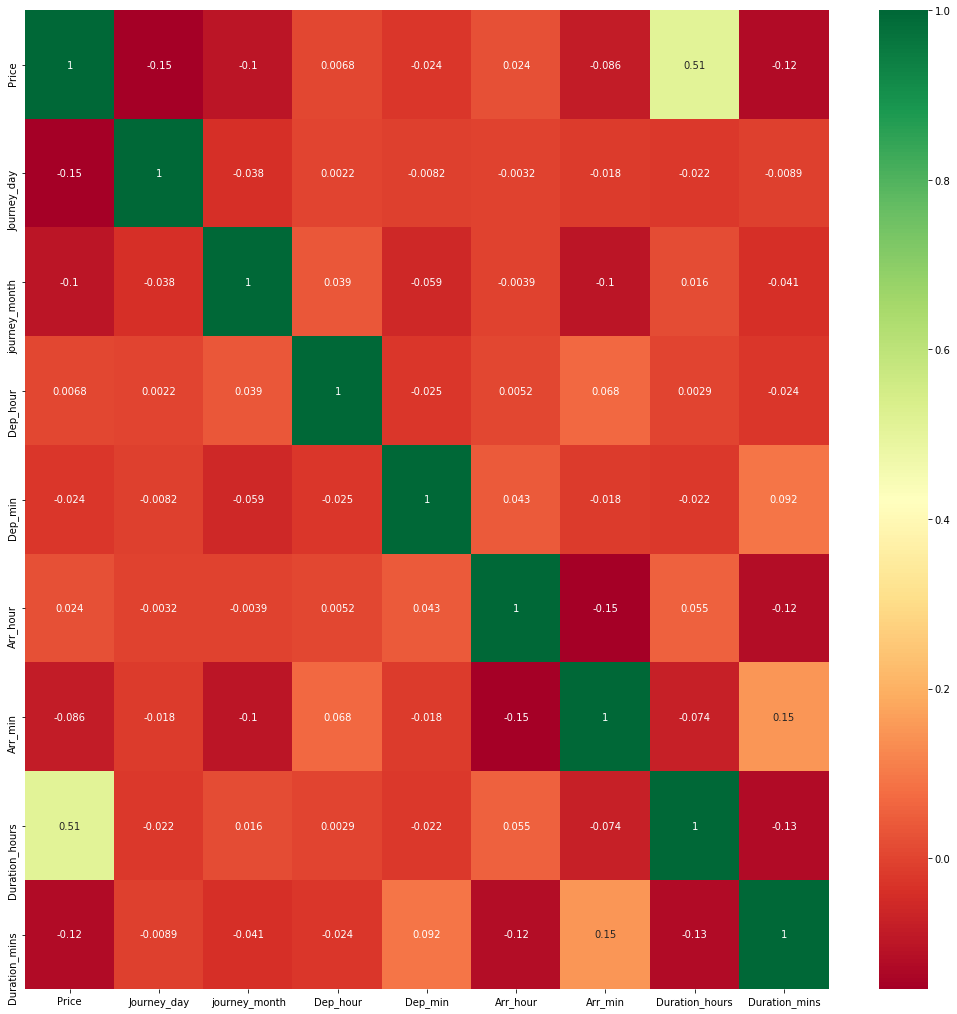

In [59]:
plt.figure(figsize=(18,18))
sns.heatmap(train_df.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [60]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,Y)

C:\Users\Prajwal\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=42)

In [62]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train,Y_train)

C:\Users\Prajwal\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [63]:
y_pred=reg_rf.predict(X_test)

In [64]:
reg_rf.score(X_train,Y_train)

0.9522518268908226

In [65]:
reg_rf.score(X_test,Y_test)

0.7905834329889344

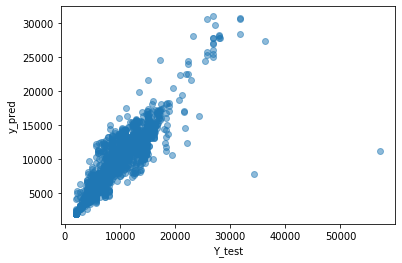

In [66]:
plt.scatter(Y_test,y_pred,alpha=0.5)
plt.xlabel('Y_test')
plt.ylabel('y_pred')
plt.show()

In [67]:
from sklearn import metrics

In [68]:
print('MAE :', metrics.mean_absolute_error(Y_test,y_pred))
print('MSE :', metrics.mean_squared_error(Y_test,y_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

MAE : 1211.9327912428653
MSE : 4515451.813105197
RMSE : 2124.9592497516737


In [69]:
metrics.r2_score(Y_test,y_pred)

0.7905834329889344